In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# EDA

In [2]:
data=pd.read_csv("blood.csv")
data.head(5)

,V1,V2,V3,V4,Class
0,2,50,12500,98,2
1,0,13,3250,28,2
2,1,16,4000,35,2
3,2,20,5000,45,2
4,1,24,6000,77,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   V1      748 non-null    int64
 1   V2      748 non-null    int64
 2   V3      748 non-null    int64
 3   V4      748 non-null    int64
 4   Class   748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [7]:
data.describe()

,V1,V2,V3,V4,Class
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,1.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,1.000000
25%,2.750000,2.000000,500.000000,16.000000,1.000000
50%,7.000000,4.000000,1000.000000,28.000000,1.000000
75%,14.000000,7.000000,1750.000000,50.000000,1.000000
max,74.000000,50.000000,12500.000000,98.000000,2.000000


In [8]:
data.isnull().any()

V1       False
V2       False
V3       False
V4       False
Class    False
dtype: bool

<Axes: >

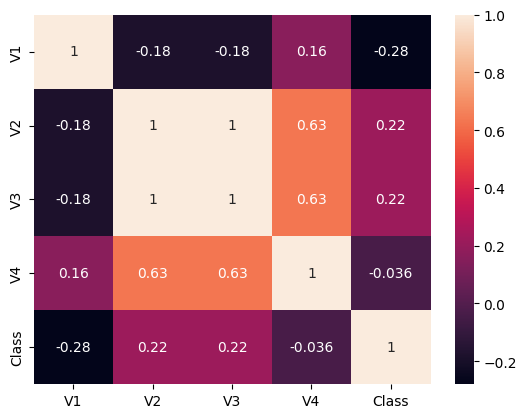

In [9]:
sns.heatmap(data.corr(),annot=True)

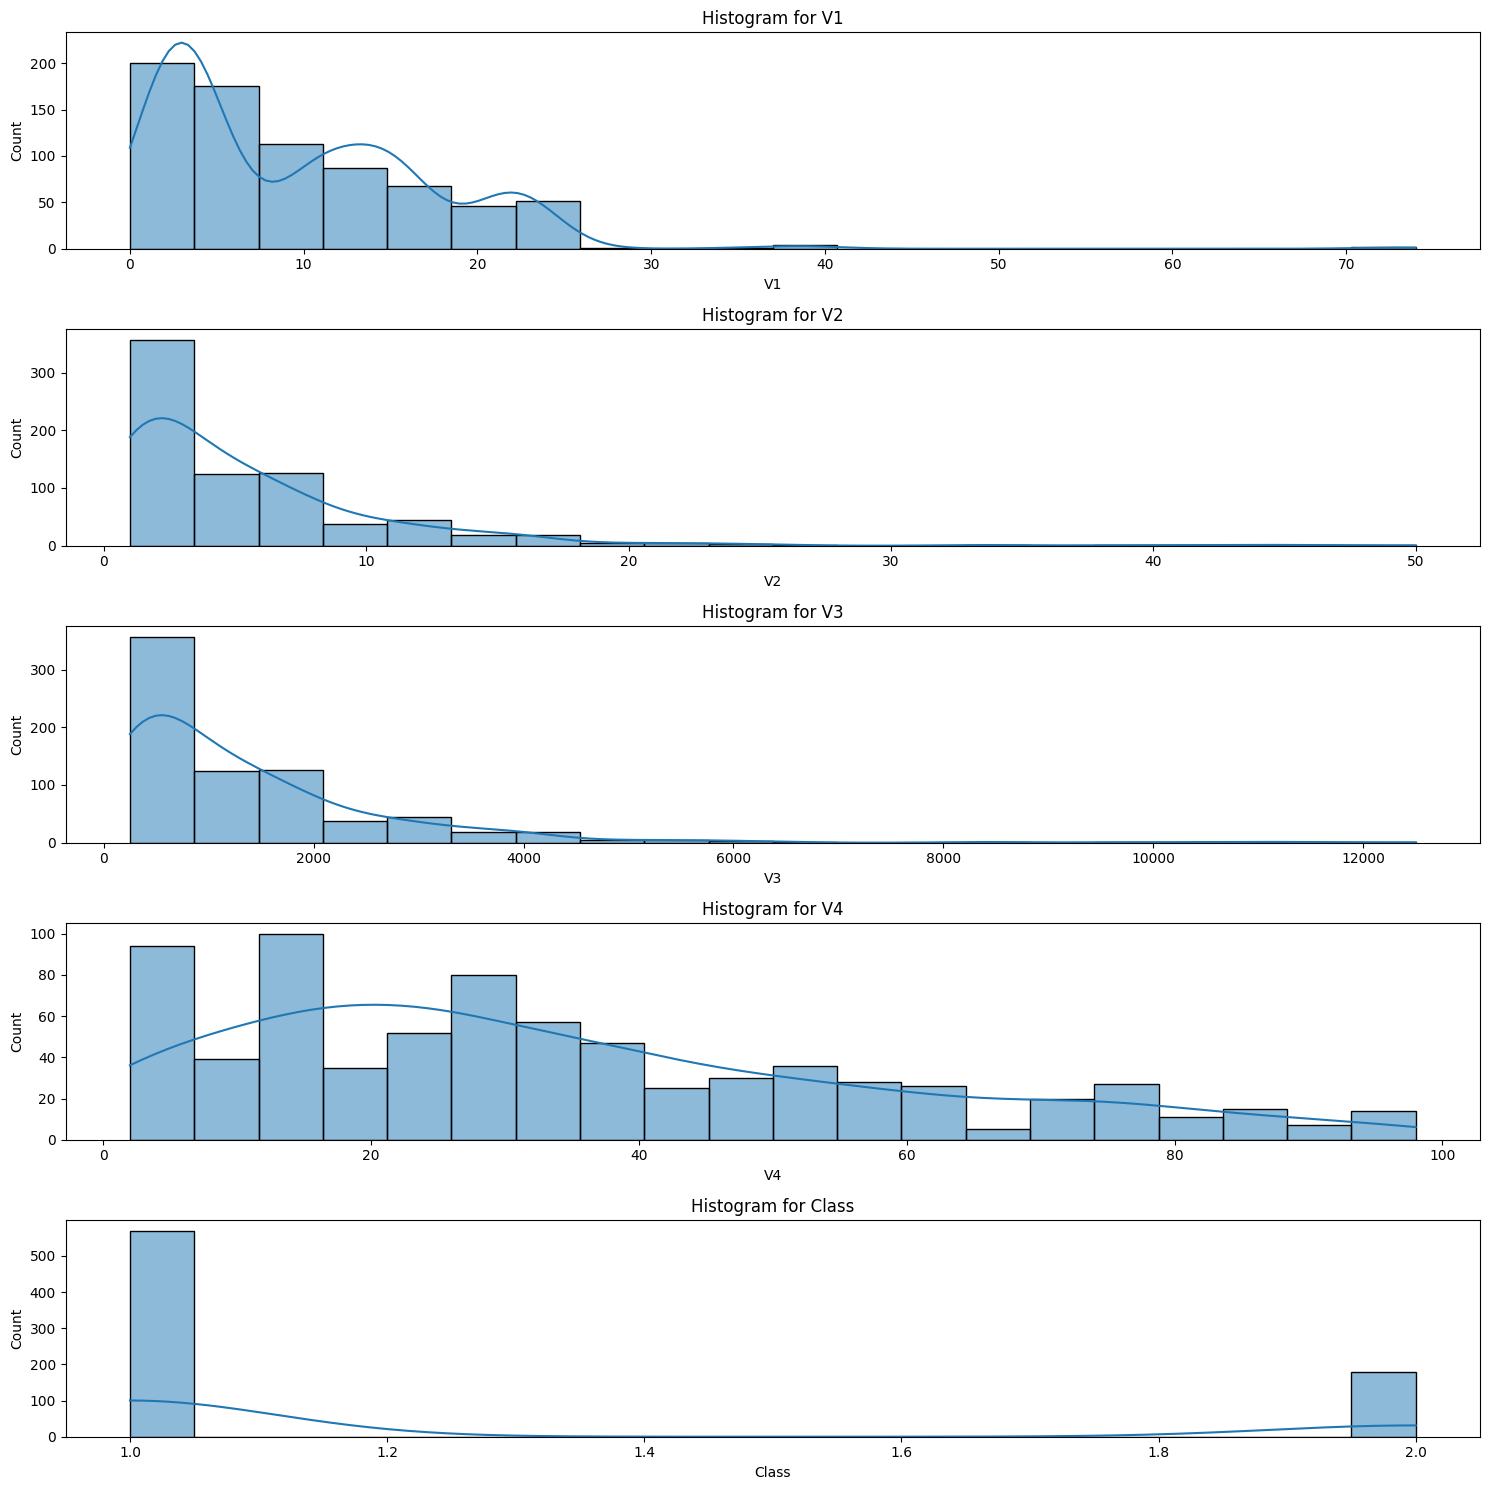

In [13]:
numerical_columns=data.select_dtypes(include=["number"]).columns
plt.figure(figsize=(15,len(numerical_columns)*3))
for i, col in enumerate(numerical_columns,1):
    plt.subplot(len(numerical_columns),1,i)
    sns.histplot(data[col],kde=True,bins=20)
    plt.title(f"Histogram for {col}")
plt.tight_layout()
plt.show()

# Data Preprocessing

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=data.drop(["Class"],axis=1)
y=data["Class"]
x=ss.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model Selection

In [25]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

In [26]:
classifier={
    "Random Forest Classifier":RandomForestClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Naive Bayes":GaussianNB()
}

# Model Accuracy

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [31]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))
    print("-"*60)

Random Forest Classifier
70.66666666666667
              precision    recall  f1-score   support

           1       0.78      0.85      0.81       113
           2       0.37      0.27      0.31        37

    accuracy                           0.71       150
   macro avg       0.58      0.56      0.56       150
weighted avg       0.68      0.71      0.69       150

------------------------------------------------------------
Ada Boost Classifier
80.66666666666666
              precision    recall  f1-score   support

           1       0.81      0.97      0.88       113
           2       0.79      0.30      0.43        37

    accuracy                           0.81       150
   macro avg       0.80      0.64      0.66       150
weighted avg       0.80      0.81      0.77       150

------------------------------------------------------------
Decision Tree Classifier
64.66666666666666
              precision    recall  f1-score   support

           1       0.75      0.79      0.77 

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
